# PCA:-Principal Component Analysis  Features Selection
    It is used to select importance features
    pca:-Reduce the dimension. It is also called dimensional reduction techinique

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
we=pd.read_csv("wine.csv")
we.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
#check null values
we.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

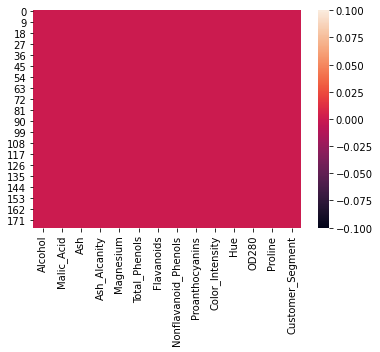

In [4]:
#check null values with heatmap
sb.heatmap(we.isnull())
plt.show()

In [5]:
we.shape

(178, 14)

In [6]:
#how many customer in customer_segment which want to predict
we['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

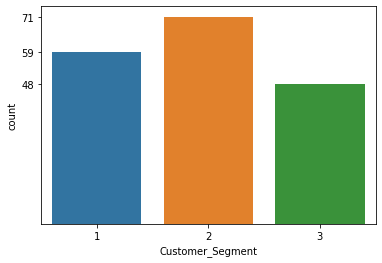

In [7]:
#Visualize the Customer_Segment
sb.countplot(data=we,x='Customer_Segment')
c=we['Customer_Segment'].value_counts()
plt.yticks(c)
plt.show()

In [8]:
#check dtypes
we.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [9]:
#select input and output
X=we.drop('Customer_Segment',axis=1)
Y=we['Customer_Segment']

In [10]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Customer_Segment, dtype: int64

In [12]:
#train_test_split
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [14]:
#Standardization
#inbuilt class standardscaler use formula Z-score=(Xi-mean of(X))/std(X)
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

# Apply PCA
  IT'S HELP FOR FEATURES SELECTION

In [15]:
from sklearn.decomposition import PCA
#create the object
pc=PCA(n_components=None,random_state=1)
#n_components inbuilt parameters here pass no. of components means pc here total input 13 features
pc

PCA(random_state=1)

In [16]:
X.shape

(178, 13)

In [17]:
X_train_pc=pc.fit_transform(X_train)#training
X_test_pc=pc.transform(X_test)#testing

In [18]:
explain_variance=pc.explained_variance_ratio_
print(explain_variance) #automatic arrange variance in descending order

[0.35168281 0.19739103 0.11318949 0.07729222 0.06125164 0.05129145
 0.04229866 0.02624925 0.02426134 0.01824268 0.01580332 0.01324335
 0.00780277]


In [19]:
#create object of PCA class
pc1=PCA(n_components=2,random_state=1)
#n_components inbuilt parameters here pass no. of components=2 means PC here #input featuers 

In [21]:
X_train_pc1=pc1.fit_transform(X_train)
X_test_pc1=pc1.transform(X_test)

In [22]:
explain_variance=pc1.explained_variance_ratio_
print(explain_variance) #automatic arrange variance in descending order

[0.35168281 0.19739103]


In [34]:
#given X_train_pc1 and Y_train to classification algorithm
def create_model(model):
    model.fit(X_train_pc1,Y_train)
    Y_pred=model.predict(X_test_pc1)
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [36]:
#use logistic regression algrothim
from sklearn.linear_model import LogisticRegression

#create the object of LogisticRegression
lr=LogisticRegression()

In [37]:
lr=create_model(lr)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


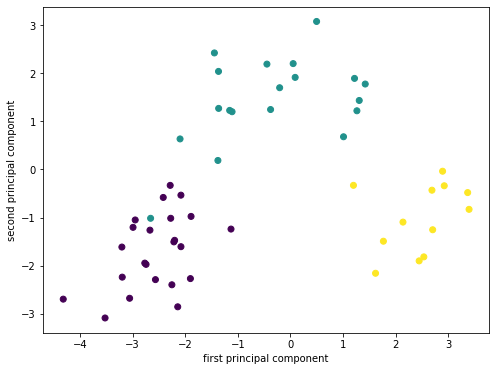

In [40]:
#giving a scatterplot
plt.figure(figsize=(8,6))
y=Y_test
x1=X_test_pc1[:,0]
x2=X_test_pc1[:,1]
plt.scatter(x1,x2,c=y) #c mwans color


#labeling x and y
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()